In [12]:
import mne
import numpy as np
import pandas as pd
from scipy.signal import coherence, hilbert

In [13]:
# ====== CONFIGURACIÓN ======
edf_path = r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S02_clases"
sfreq_target = 256            # Frecuencia de muestreo a la que normalizamos (Hz)
fmin, fmax = 8, 13            # Banda alfa para la coherencia (puedes ajustar)

In [14]:
# ====== CARGA Y PREPROCESAMIENTO ======
raw = mne.io.read_raw_edf(edf_path, preload=True)
raw.resample(sfreq_target)
raw.filter(1., 45., fir_design='firwin')
data = raw.get_data()
ch_names = raw.info['ch_names']
n_channels = len(ch_names)

NotImplementedError: Only EDF files are supported, got .

In [9]:
data

NameError: name 'data' is not defined

In [7]:
ch_names
n_channels

Index(['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
       'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10',
       'FT10-T8', 'T8-P8-1'],
      dtype='object')

In [8]:
# ====== 1. MATRIZ DE CORRELACIÓN DE PEARSON ======
corr_matrix = np.corrcoef(data)
corr_df = pd.DataFrame(corr_matrix, index=ch_names, columns=ch_names)
corr_df.to_csv("connectivity_pearson.csv")

# ====== 2. MATRIZ DE COHERENCIA ESPECTRAL ======
coh_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        f, Cxy = coherence(data[i], data[j], fs=sfreq_target, nperseg=sfreq_target*2)
        mask = (f >= fmin) & (f <= fmax)
        coh_matrix[i, j] = np.mean(Cxy[mask])

coh_df = pd.DataFrame(coh_matrix, index=ch_names, columns=ch_names)
coh_df.to_csv("connectivity_coherence.csv")

# ====== 3. MATRIZ DE PHASE LOCKING VALUE (PLV) ======
analytic_signal = hilbert(data)
phase_data = np.angle(analytic_signal)

plv_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        phase_diff = phase_data[i] - phase_data[j]
        plv_matrix[i, j] = np.abs(np.sum(np.exp(1j * phase_diff)) / phase_diff.size)

plv_df = pd.DataFrame(plv_matrix, index=ch_names, columns=ch_names)
plv_df.to_csv("connectivity_plv.csv")

print("✅ Matrices de conectividad generadas:")
print("- connectivity_pearson.csv")
print("- connectivity_coherence.csv")
print("- connectivity_plv.csv")


NameError: name 'data' is not defined

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

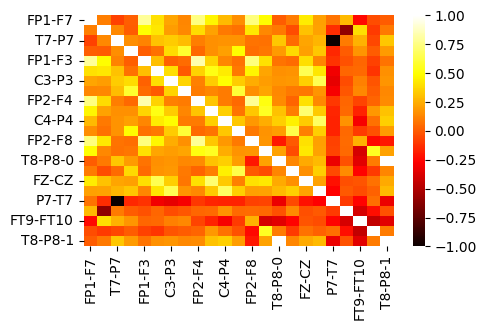

In [22]:
plt.figure(figsize=(5, 3))
sns.heatmap(corr_df, cmap='hot')

<Axes: >

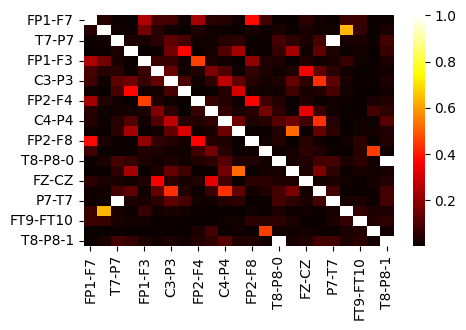

In [21]:
plt.figure(figsize=(5, 3))
sns.heatmap(coh_df, cmap='hot')

<Axes: >

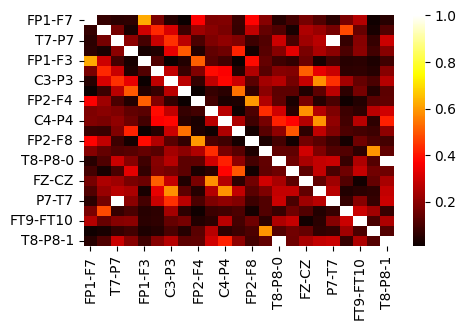

In [23]:
plt.figure(figsize=(5, 3))
sns.heatmap(plv_df, cmap='hot')